In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Input
from tensorflow.keras.datasets import fashion_mnist

In [2]:
# Data processing

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [3]:
input_shape = (x_train.shape[1:] + (1,)) # (28, 28, 1)
num_classes = len(np.unique(y_train))  # 10

In [5]:
num_classes

10

#input_shape is a tuple telling the model about the shape of the input it will be getting. 
#Note that instead of (28 x 28) we have the shape as (28 x 28 x 1). This is necessary because 2D CNNs accept 
#3D input tensors. Since our images are grayscale we need to add a dimension at the end. If our images were 
#colored then their shape would be (28 x 28 x 3), 3 because there are 3 color channels Red, Green and Blue. 

In [6]:
# One hot encoding because we use categorical_crossentropy loss when training the model.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [10]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
inp = Input(shape=input_shape)
_ = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(inp)
_ = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(_)
_ = MaxPool2D(pool_size=(2, 2))(_)
_ = Dropout(0.25)(_)
_ = Flatten()(_)
_ = Dense(units=128, activation='relu')(_)
_ = Dropout(0.2)(_)
_ = Dense(units=num_classes, activation='softmax')(_)
model = Model(inputs=inp, outputs=_)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)              

In [12]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
history = model.fit(np.expand_dims(x_train, -1), y_train, batch_size=128, epochs=12, validation_split=0.3)

Epoch 1/12
329/329 [==============================] - 34s 105ms/step - loss: 0.4971 - accuracy: 0.8225 - val_loss: 0.3265 - val_accuracy: 0.8813
Epoch 2/12
329/329 [==============================] - 35s 107ms/step - loss: 0.3132 - accuracy: 0.8871 - val_loss: 0.2700 - val_accuracy: 0.9027
Epoch 3/12
329/329 [==============================] - 43s 131ms/step - loss: 0.2595 - accuracy: 0.9046 - val_loss: 0.2548 - val_accuracy: 0.9078
Epoch 4/12
329/329 [==============================] - 39s 120ms/step - loss: 0.2233 - accuracy: 0.9171 - val_loss: 0.2403 - val_accuracy: 0.9132
Epoch 5/12
329/329 [==============================] - 37s 113ms/step - loss: 0.1961 - accuracy: 0.9280 - val_loss: 0.2301 - val_accuracy: 0.9164
Epoch 6/12
329/329 [==============================] - 38s 116ms/step - loss: 0.1733 - accuracy: 0.9355 - val_loss: 0.2402 - val_accuracy: 0.9156
Epoch 7/12
329/329 [==============================] - 38s 115ms/step - loss: 0.1526 - accuracy: 0.9426 - val_loss: 0.2353 - val_ac

In [13]:
loss, accuracy = model.evaluate(np.expand_dims(x_test, -1), y_test, verbose=0)
print(loss, accuracy)

0.27842530608177185 0.9230999946594238


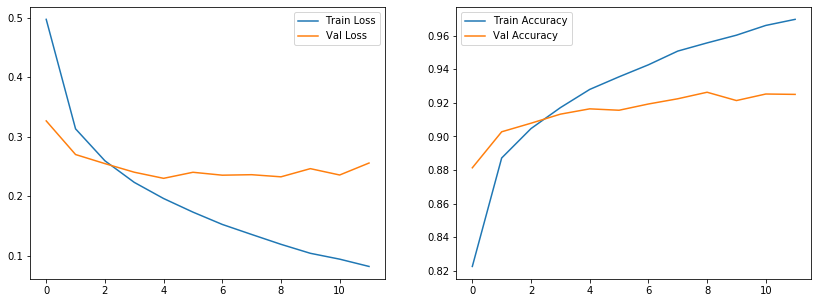

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
ax1.plot(history.history['loss'], label='Train Loss')
ax1.plot(history.history['val_loss'], label='Val Loss')
ax1.legend()
ax2.plot(history.history['accuracy'], label='Train Accuracy')
ax2.plot(history.history['val_accuracy'], label='Val Accuracy')
ax2.legend()